In [1]:
import os
import pandas as pd

# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)

print("Set the printing size of the pandas df... ")
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Set the printing size of the pandas df... 


In [2]:
# Plan to test 

# 0. The alignment of D1, D2 curves 

# 1. Ampltitude, frequency of four original curves and linear predict locomotion 
# (normalized curves, FFT, programatical methods)

# 2. Ampltitude, frequency of D1, D2 curves and linear predict locomotion 
# (normalized curves, FFT, programatical methods)



# Load in data

In [3]:

# get the path
path = os.getcwd()
files = os.listdir(path + '/data/excel/')

# filter excel
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
print("files_xlsx: ", files_xlsx)

# get all excel files 
# init ls_files 
ls_files = [] 
print("store in list: ls_files")
# looping
for f in files_xlsx:
    # read excel 
    file_name = pd.read_excel('data/excel/'+f, 'Raw data 3D co.')
    # append
    ls_files.append(file_name)

files_xlsx:  ['1-18-21-leona-clip1.xlsx', '1-18-21-leona-clip2_copy.xlsx', '1-19-21-honey-clip1.xlsx', '1-19-21-leona_clip1.xlsx', '1-19-21-leona_clip2_copy.xlsx', '1-20-21-beyonce-clip1.xlsx', '1-20-21-honey-clip1.xlsx', '1-20-21-leona_clip1.xlsx', '1-20-21-leona_clip2.xlsx', '1-20-21-penelope_clip1.xlsx', '1-20-21-penelope_clip2_copy.xlsx', '1-21-21-beyonce_clip1_copy.xlsx', '1-21-21-honey-clip2_copy.xlsx', '1-21-21-penelope_clip1_copy.xlsx', '1-21-21-penelope_clip2_copy.xlsx', '1-22-21-beyonce-clip2.xlsx', '1-22-21-beyonce_clip1_copy2.xlsx', '1-22-21-honey-clip1.xlsx', '1-22-21-honey-clip2_copy.xlsx', '1-22-21-penelope_clip1_copy.xlsx', '1-25-21-moonique_clip1.xlsx', '1-25-21-moonique_clip2.xlsx', '1-26-21-alice_clip1_copy.xlsx', '1-26-21-moonique_clip1_copy.xlsx', '1-26-21-moonique_clip2.xlsx', '1-28-21-alice_clip1.xlsx', '1-28-21-alice_clip2_copy.xlsx', '1-28-21-moonique_clip2.xlsx', '2-1-21-tweet_clip1.xlsx', '2-10-21-moolan_clip1.xlsx', '2-10-21-moolan_clip2.xlsx', '2-11-21-loza

In [4]:
""" 
func:
    process each file 
args: 
    ls_files: list[pd]
    align: bool (do we align dataset before dropna)
return: 
    ls_pds: list[pd]
"""
def process_each_file(ls_files, align=False):
    
    # init ls_pds 
    ls_pds = [] 
    
    # looping 
    for file in range(len(ls_files)):
        # one file, keep the last 16 columns (back markers)
        one_file = ls_files[file].iloc[:, -16:]
        # if align
        if align: 
            # drop nan and move up the numbers 
            one_file = one_file.apply(lambda x: pd.Series(x.dropna().values))

        # drop nan 
        one_file_all_clean = one_file.dropna()

        # append 
        ls_pds.append(one_file_all_clean)
    
    print("length of ls_pds: ", len(ls_pds))
    return ls_pds

In [5]:
"""using func: process_each_file"""
ls_pds = process_each_file(ls_files)

length of ls_pds:  69


# Load in labels

Obtain the binary label:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


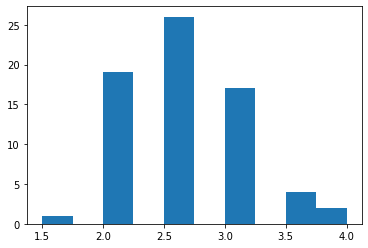

In [6]:
# load from excel 
labels_12 = pd.read_excel('data/NRS_LABEL.xlsx')

# get index for each example
idx = [i for i in range(len(files_xlsx))]
ls_idx = [12*i for i in idx]
#print("ls_idx: ", ls_idx)

# get every 12 labels (because each repeats 12 times)
labels = labels_12.iloc[ls_idx, :]

# sort by the first columns
labels_sort = labels.sort_values(labels.columns[0])
# add col 
labels_sort['name'] = files_xlsx
# print(labels_sort)

# label list 
labels_ls = labels_sort['nrs-score'].tolist()
import matplotlib.pyplot as plt
# plot histogram
plt.hist(labels_ls, density=False)

# get a binary list
binary_ls = [1 if i > 3 else 0 for i in labels_ls]
print("Obtain the binary label: ", binary_ls)

# Visualization

### Two curves (D1: B4-B3, D2: B1-B2)

In [12]:

""" 
func: 
    to plot the d
args: 
    file: pd
    binary_score: bool
    choose: str
"""
def plot_d(test, binary_score, plot_pos=False):

    # if only plot pos, return none for neg class
    if plot_pos != binary_score: return None 
    
    # create D1 and D2
    test['D1'] = test['Z-B4'] - test['Z-B3']
    test['D2'] = test['Z-B2'] - test['Z-B1']

    # plot
    plt.plot(test['Z-B1'], label='Z-B1')
    plt.plot(test['Z-B2'], label='Z-B2')
    plt.plot(test['Z-B3'], label='Z-B3')
    plt.plot(test['Z-B4'], label='Z-B4')

    plt.legend()
    plt.show()

----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------
----------  0 

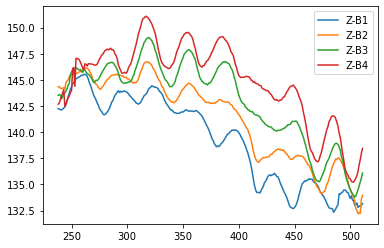

----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  1  ------------
----------  3.5  ------------


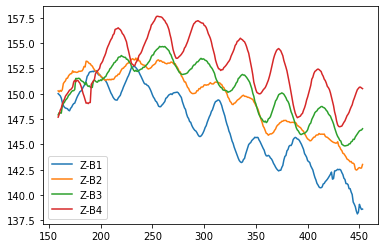

----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.0  ------------
----------  1  ------------
----------  3.5  ------------


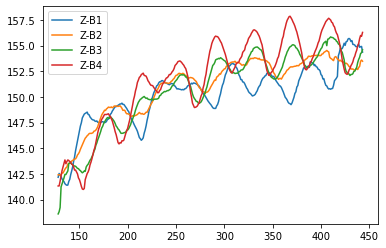

----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  3.0  ------------
----------  1  ------------
----------  3.5  ------------


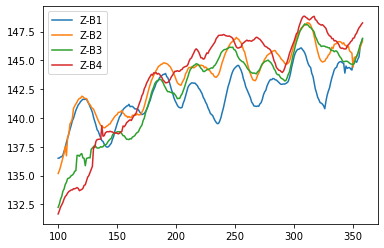

----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  3.0  ------------
----------  0  ------------
----------  1.5  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  1  ------------
----------  4.0  ------------


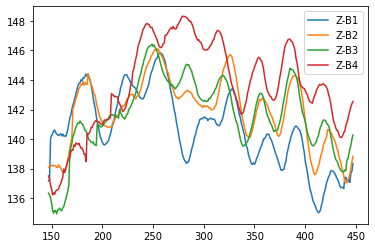

----------  1  ------------
----------  3.5  ------------


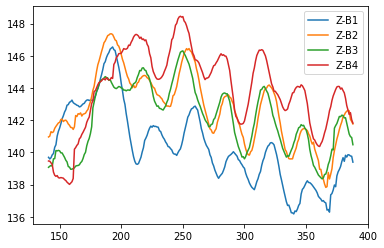

----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.0  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  2.5  ------------
----------  0  ------------
----------  3.0  ------------


In [15]:
for i in range(len(ls_pds)):
    print("---------- ", binary_ls[i], " ------------")
    #print("---------- ", files_xlsx[i], " ------------")
    print("---------- ", labels_ls[i], " ------------")
    
    """using func: plot_d"""
    plot_d(ls_pds[i], binary_ls[i], plot_pos=True)

----------  0  ------------
----------  3.0  ------------


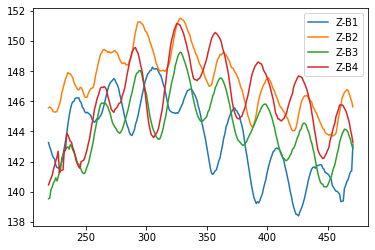

----------  0  ------------
----------  2.5  ------------


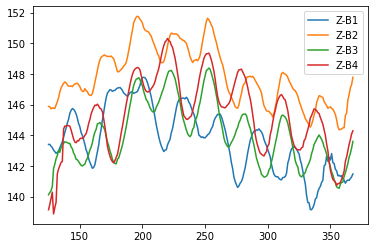

----------  0  ------------
----------  3.0  ------------


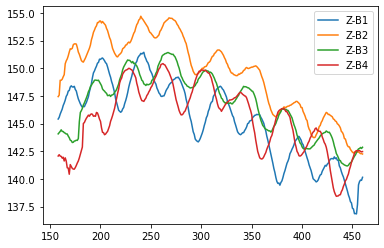

----------  0  ------------
----------  2.0  ------------


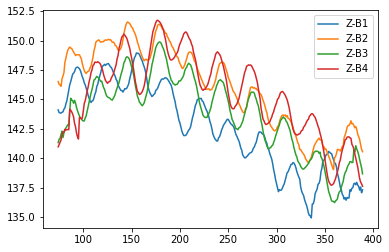

----------  0  ------------
----------  2.0  ------------


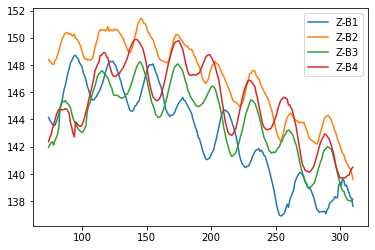

----------  0  ------------
----------  2.5  ------------


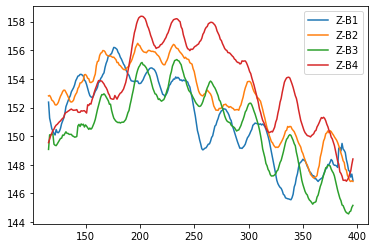

----------  0  ------------
----------  2.5  ------------


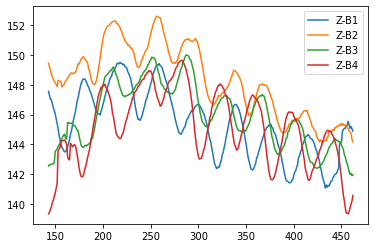

----------  0  ------------
----------  2.5  ------------


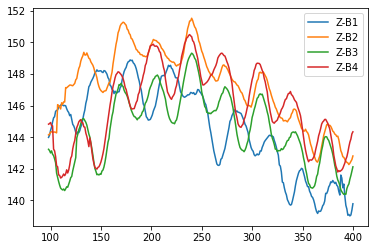

----------  0  ------------
----------  3.0  ------------


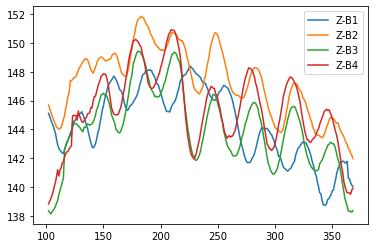

----------  0  ------------
----------  2.5  ------------


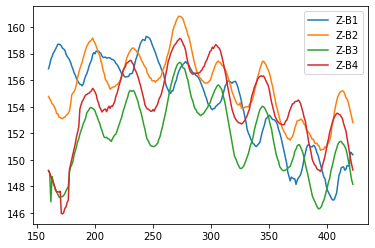

----------  0  ------------
----------  2.5  ------------


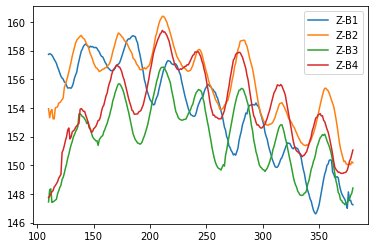

----------  0  ------------
----------  2.5  ------------


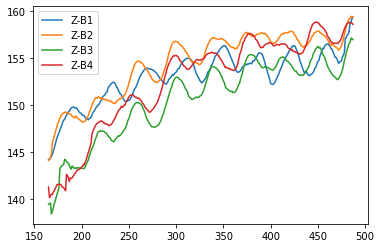

----------  0  ------------
----------  3.0  ------------


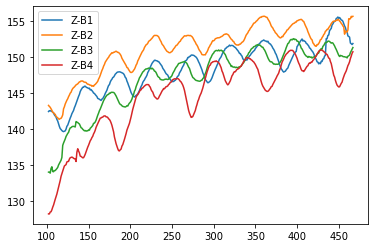

----------  0  ------------
----------  2.5  ------------


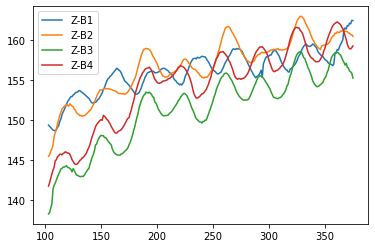

----------  0  ------------
----------  2.5  ------------


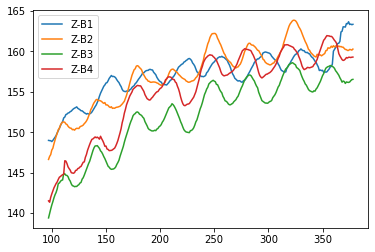

----------  0  ------------
----------  2.5  ------------


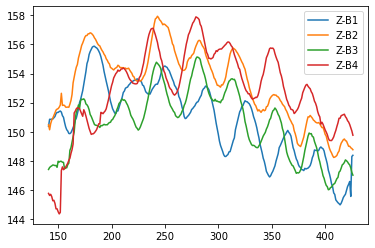

----------  0  ------------
----------  3.0  ------------


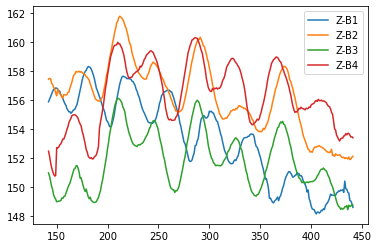

----------  0  ------------
----------  3.0  ------------


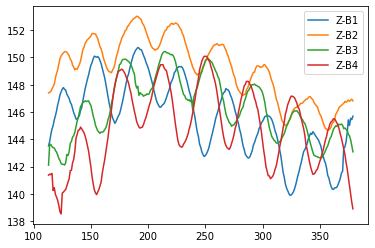

----------  0  ------------
----------  3.0  ------------


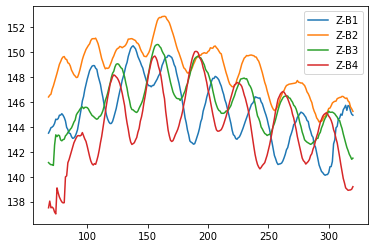

----------  0  ------------
----------  3.0  ------------


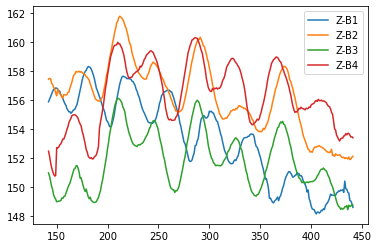

----------  0  ------------
----------  2.0  ------------


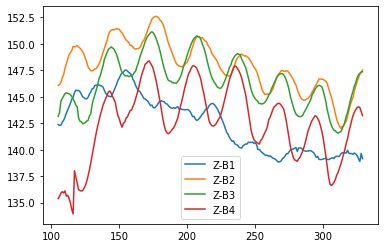

----------  0  ------------
----------  2.0  ------------


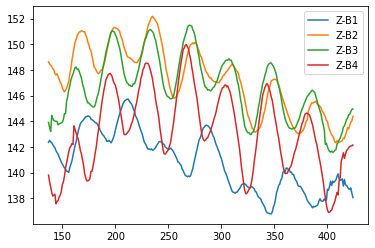

----------  0  ------------
----------  2.5  ------------


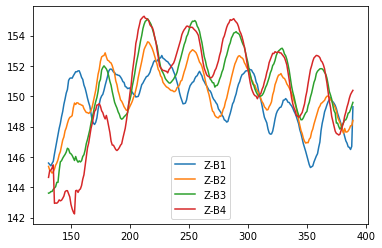

----------  0  ------------
----------  2.0  ------------


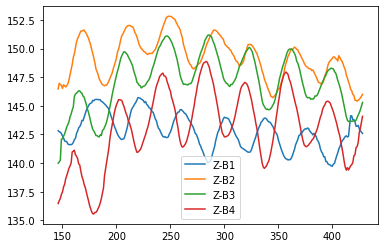

----------  0  ------------
----------  2.0  ------------


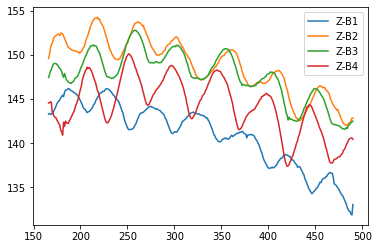

----------  0  ------------
----------  2.5  ------------


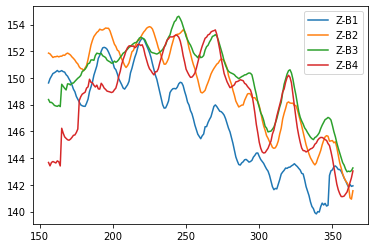

----------  0  ------------
----------  3.0  ------------


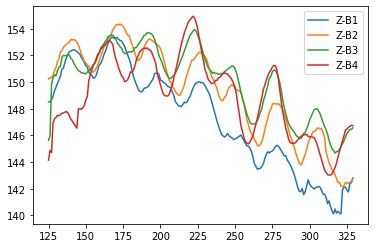

----------  0  ------------
----------  2.0  ------------


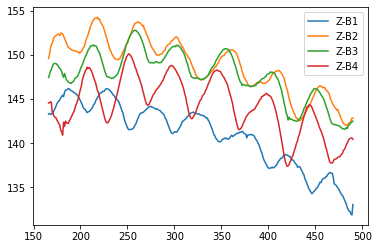

----------  1  ------------
----------  4.0  ------------
----------  0  ------------
----------  2.0  ------------


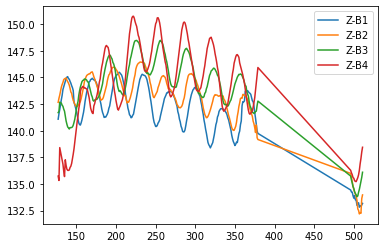

----------  0  ------------
----------  2.0  ------------


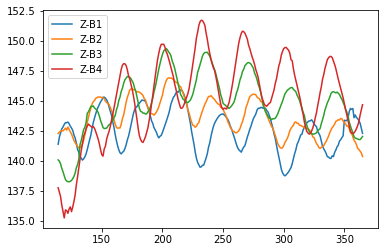

----------  0  ------------
----------  2.0  ------------


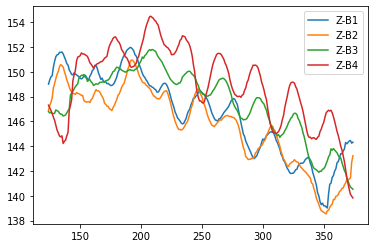

----------  0  ------------
----------  2.0  ------------


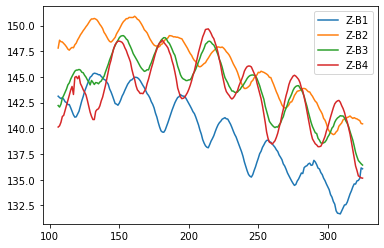

----------  1  ------------
----------  3.5  ------------
----------  0  ------------
----------  3.0  ------------


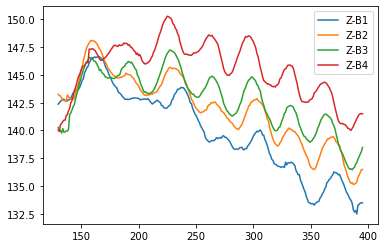

----------  0  ------------
----------  2.5  ------------


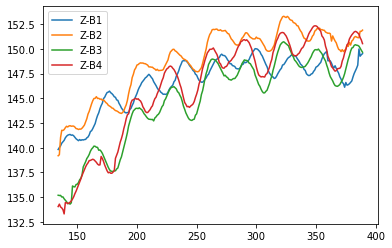

----------  0  ------------
----------  2.5  ------------


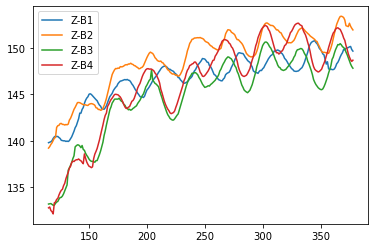

----------  0  ------------
----------  2.5  ------------


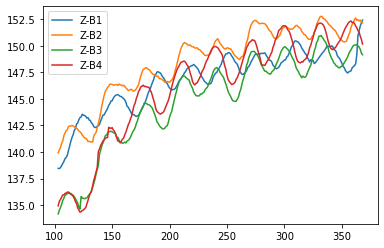

----------  0  ------------
----------  2.0  ------------


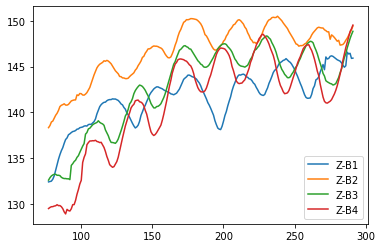

----------  1  ------------
----------  3.5  ------------
----------  0  ------------
----------  3.0  ------------


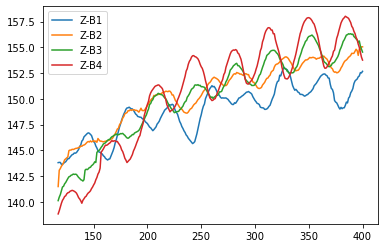

----------  0  ------------
----------  3.0  ------------


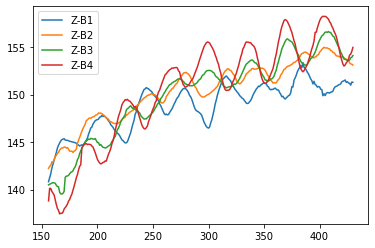

----------  1  ------------
----------  3.5  ------------
----------  0  ------------
----------  2.0  ------------


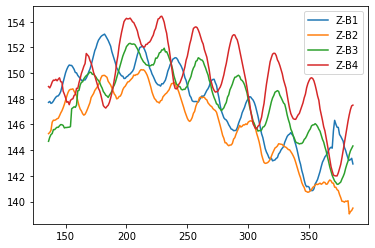

----------  0  ------------
----------  2.0  ------------


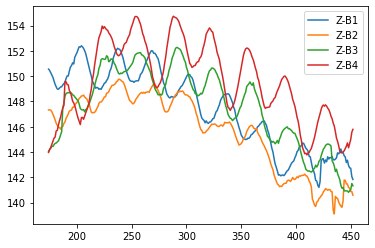

----------  0  ------------
----------  2.5  ------------


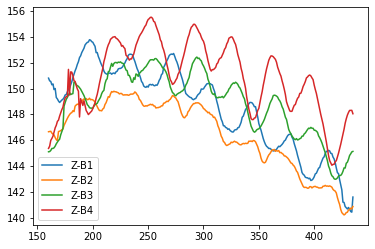

----------  0  ------------
----------  3.0  ------------


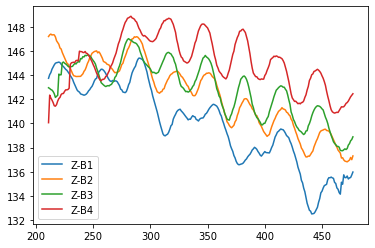

----------  0  ------------
----------  3.0  ------------


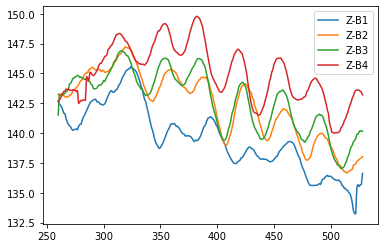

----------  0  ------------
----------  2.0  ------------


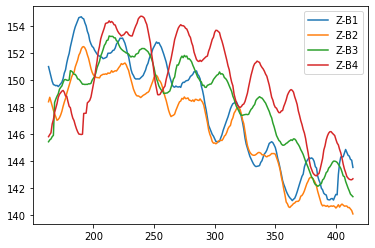

----------  0  ------------
----------  2.0  ------------


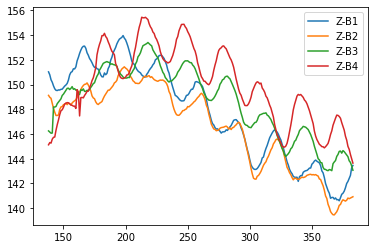

----------  0  ------------
----------  2.5  ------------


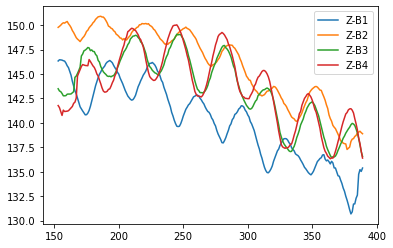

----------  0  ------------
----------  2.5  ------------


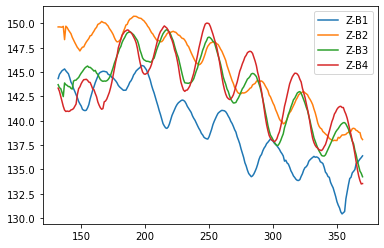

----------  0  ------------
----------  3.0  ------------


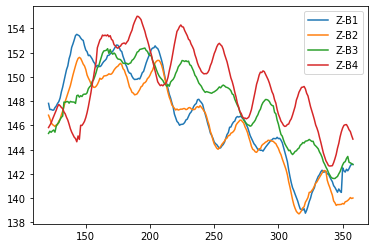

----------  0  ------------
----------  3.0  ------------


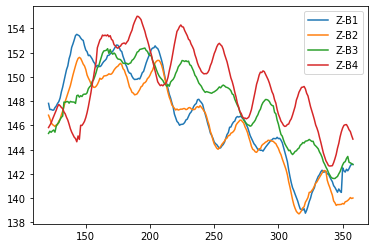

----------  0  ------------
----------  1.5  ------------


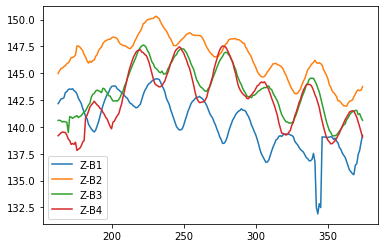

----------  0  ------------
----------  2.0  ------------


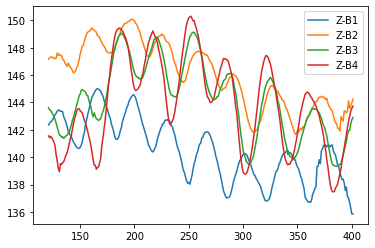

----------  0  ------------
----------  2.5  ------------


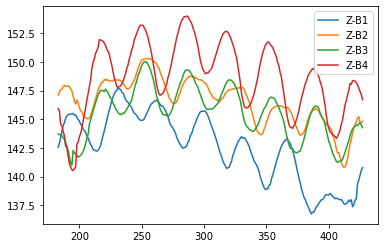

----------  1  ------------
----------  4.0  ------------
----------  1  ------------
----------  3.5  ------------
----------  0  ------------
----------  2.0  ------------


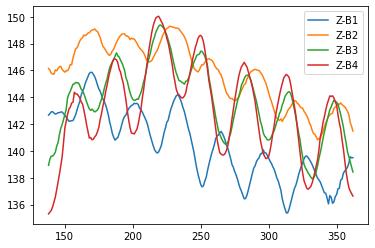

----------  0  ------------
----------  2.0  ------------


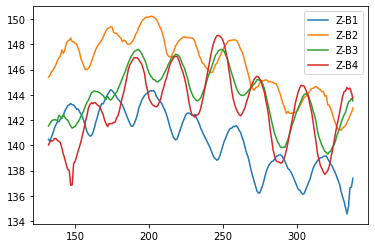

----------  0  ------------
----------  2.5  ------------


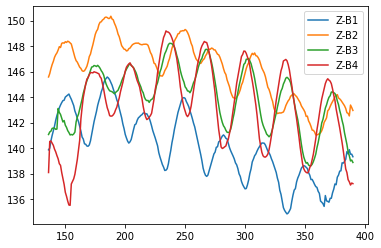

----------  0  ------------
----------  2.5  ------------


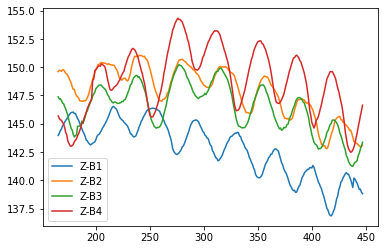

----------  0  ------------
----------  2.5  ------------


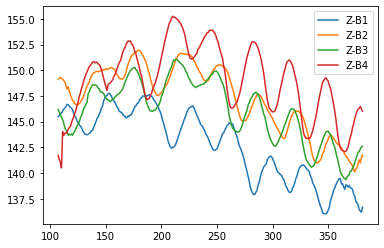

----------  0  ------------
----------  2.5  ------------


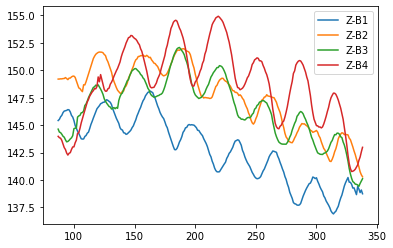

----------  0  ------------
----------  2.5  ------------


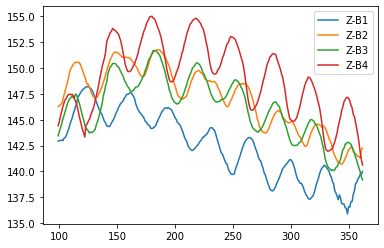

----------  0  ------------
----------  2.5  ------------


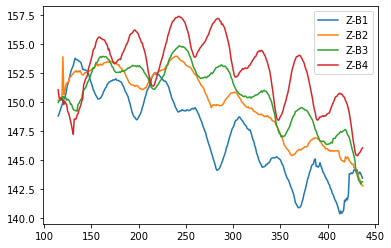

----------  0  ------------
----------  2.5  ------------


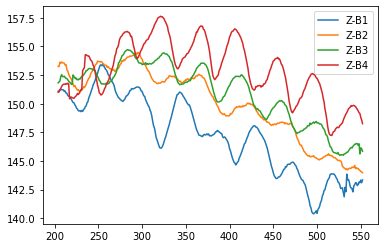

----------  0  ------------
----------  3.0  ------------


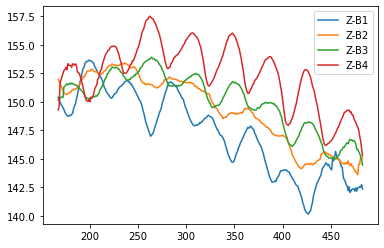

In [17]:
for i in range(len(ls_pds)):
    print("---------- ", binary_ls[i], " ------------")
    print("---------- ", labels_ls[i], " ------------")
    """using func: plot_d"""
    plot_d(ls_pds[i], binary_ls[i], plot_pos=False)

### Examine D1, D2

In [87]:
""" 
func: 
    called by normalize a wave curve
"""
def one_wave(temp_ls, plot=False):
    temp_ls = temp_ls.reset_index(drop=True)
    #plt.plot(temp_ls)

    # get long-term trend
    long_trend = temp_ls.rolling(50, center=True).mean()
    
    # get average of the long_trend 
    mid_trend = long_trend.mean()
    mid_trend_ls = [mid_trend for i in range(len(long_trend))]

    # get diff: (diff: long_trend - mid_trend_ls)
    diff = long_trend - mid_trend_ls
    
    # result
    ls_sub = temp_ls - diff
    # drop nan
    ls_sub = ls_sub.dropna()
    
    if plot: 
        plt.plot(temp_ls, label='original')
        plt.plot(long_trend, label='long_trend')
        plt.plot(mid_trend_ls, label='average')
        plt.plot(diff, label='diff')
        plt.plot(ls_sub, label='result')
        plt.legend()
        plt.show()
        
    # return the normalized
    return ls_sub.tolist()

""" 
func: 
    normalize a wave curve 
arg: 
    
return: 
    series changed
"""
def normalize_wave(one_ex):
    
    # init an pandas
    df = pd.DataFrame() 
    
    # normalize D1
    temp_ls = one_ex['D1']
    df['D1_nor'] = one_wave(temp_ls, plot=False)

    # normalize D2
    temp_ls_2 = one_ex['D2']
    df['D2_nor'] = one_wave(temp_ls_2, plot=False)

    return df

In [88]:
# init pds_nor
pds_nor = []
# looping
for i in range(len(ls_pds)):
    #print("---------- ", binary_ls[i], " ------------")
    #print("---------- ", files_xlsx[i], " ------------")
    """using func: normalize_wave"""
    one_ex = normalize_wave(ls_pds[i])
    pds_nor.append(one_ex)

### Visualize again after normalization

In [89]:

def plot_d_nor(test, binary_score, only_pos=False):

    # if only plot pos, return none for neg class
    if only_pos != binary_score: return None 

    # plot
    plt.plot(test['D1_nor'], label='D1_nor')
    plt.plot(test['D2_nor'], label='D2_nor')

    plt.legend()
    plt.show()

----------  0  ------------
----------  1-18-21-leona-clip1.xlsx  ------------
----------  0  ------------
----------  1-18-21-leona-clip2_copy.xlsx  ------------
----------  0  ------------
----------  1-19-21-honey-clip1.xlsx  ------------
----------  0  ------------
----------  1-19-21-leona_clip1.xlsx  ------------
----------  0  ------------
----------  1-19-21-leona_clip2_copy.xlsx  ------------
----------  0  ------------
----------  1-20-21-beyonce-clip1.xlsx  ------------
----------  0  ------------
----------  1-20-21-honey-clip1.xlsx  ------------
----------  0  ------------
----------  1-20-21-leona_clip1.xlsx  ------------
----------  0  ------------
----------  1-20-21-leona_clip2.xlsx  ------------
----------  0  ------------
----------  1-20-21-penelope_clip1.xlsx  ------------
----------  0  ------------
----------  1-20-21-penelope_clip2_copy.xlsx  ------------
----------  0  ------------
----------  1-21-21-beyonce_clip1_copy.xlsx  ------------
----------  0  -------

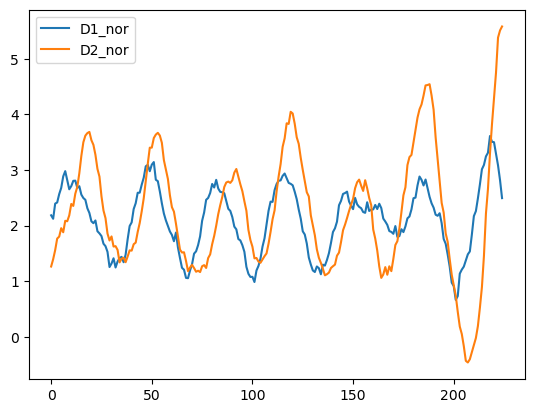

----------  0  ------------
----------  2-10-21-moolan_clip1.xlsx  ------------
----------  0  ------------
----------  2-10-21-moolan_clip2.xlsx  ------------
----------  0  ------------
----------  2-11-21-loza_clip1.xlsx  ------------
----------  0  ------------
----------  2-11-21-moon_clip1.xlsx  ------------
----------  1  ------------
----------  2-11-21-robin_clip1.xlsx  ------------


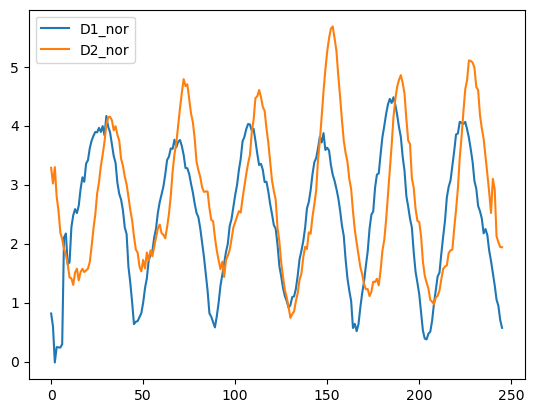

----------  0  ------------
----------  2-11-21-tweet_clip1.xlsx  ------------
----------  0  ------------
----------  2-12-21-leona_clip1.xlsx  ------------
----------  0  ------------
----------  2-12-21-leona_clip2.xlsx  ------------
----------  0  ------------
----------  2-12-21-leona_clip3.xlsx  ------------
----------  0  ------------
----------  2-12-21-moon_clip1.xlsx  ------------
----------  1  ------------
----------  2-12-21-robin_clip1.xlsx  ------------


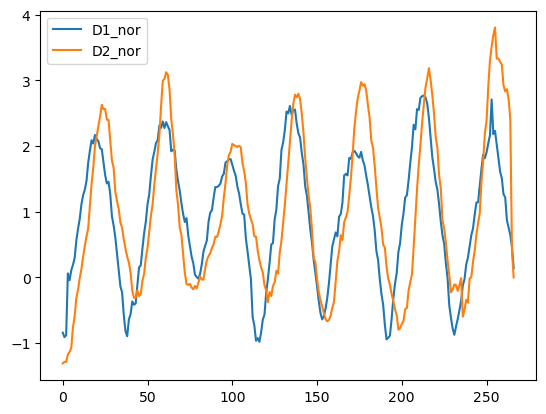

----------  0  ------------
----------  2-12-21-robin_clip2.xlsx  ------------
----------  0  ------------
----------  2-12-21-robin_clip3.xlsx  ------------
----------  1  ------------
----------  2-12-21-tweet_clip1.xlsx  ------------


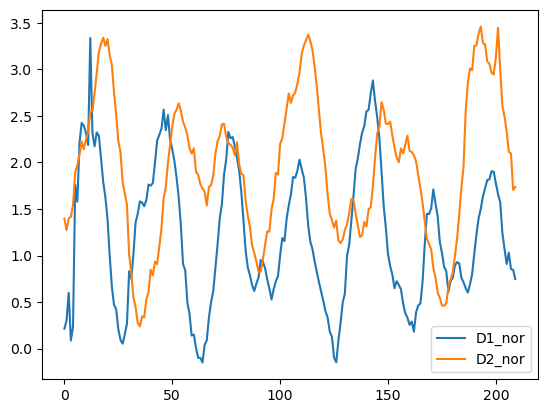

----------  0  ------------
----------  2-2-21-loza_clip1.xlsx  ------------
----------  0  ------------
----------  2-2-21-loza_clip2.xlsx  ------------
----------  0  ------------
----------  2-2-21-loza_clip3.xlsx  ------------
----------  0  ------------
----------  2-2-21-tweet_clip1.xlsx  ------------
----------  0  ------------
----------  2-2-21-tweet_clip2.xlsx  ------------
----------  0  ------------
----------  2-3-21-loza_clip1.xlsx  ------------
----------  0  ------------
----------  2-3-21-loza_clip3.xlsx  ------------
----------  0  ------------
----------  2-3-21-moon_clip1.xlsx  ------------
----------  0  ------------
----------  2-3-21-moon_clip2.xlsx  ------------
----------  0  ------------
----------  2-4-21-loza_clip1.xlsx  ------------
----------  0  ------------
----------  2-4-21-loza_clip2.xlsx  ------------
----------  0  ------------
----------  2-5-21-moon_clip1.xlsx  ------------
----------  0  ------------
----------  2-5-21-moon_clip2.xlsx  ----------

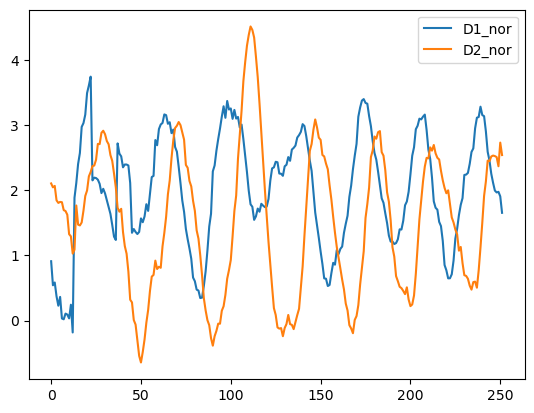

----------  1  ------------
----------  2-5-21-tweet_clip2.xlsx  ------------


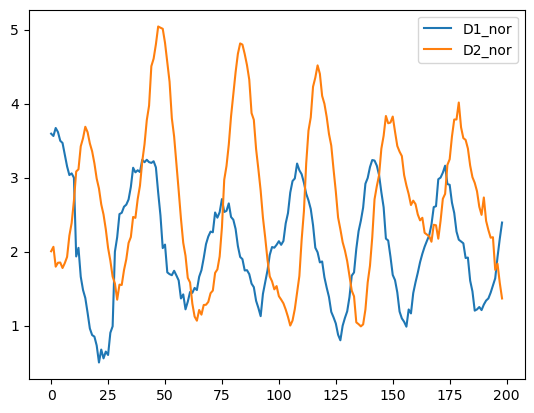

----------  0  ------------
----------  2-8-21-moon_clip1.xlsx  ------------
----------  0  ------------
----------  2-8-21-moon_clip2.xlsx  ------------
----------  0  ------------
----------  2-8-21-moon_clip3.xlsx  ------------
----------  0  ------------
----------  2-8-21-ptitnugget_clip2.xlsx  ------------
----------  0  ------------
----------  2-9-21-PtitNugget-clip1_manual.xlsx  ------------
----------  0  ------------
----------  2-9-21-PtitNugget-clip2_manual.xlsx  ------------
----------  0  ------------
----------  2-9-21-PtitNugget-clip3_manual.xlsx  ------------
----------  0  ------------
----------  2-9-21-Robin-clip1_manual.xlsx  ------------
----------  0  ------------
----------  2-9-21-Robin-clip2_manual.xlsx  ------------
----------  0  ------------
----------  2-9-21-Robin-clip3_manual.xlsx  ------------


In [90]:
for i in range(len(pds_nor)):
    print("---------- ", binary_ls[i], " ------------")
    print("---------- ", files_xlsx[i], " ------------")
    """using func: plot_d"""
    plot_d_nor(pds_nor[i], binary_ls[i], only_pos=True)

----------  1  ------------
----------  1-18-21-leona-clip1.xlsx  ------------
----------  0  ------------
----------  1-18-21-leona-clip2_copy.xlsx  ------------


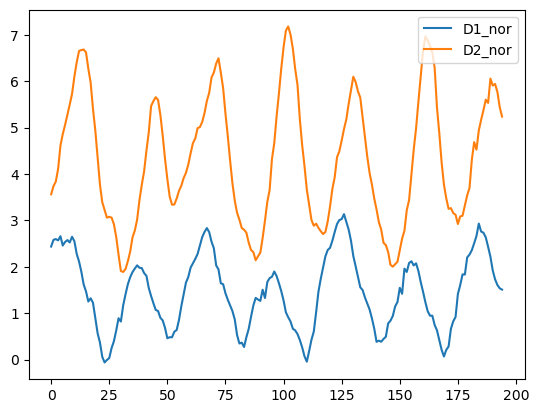

----------  1  ------------
----------  1-19-21-honey-clip1.xlsx  ------------
----------  0  ------------
----------  1-19-21-leona_clip1.xlsx  ------------


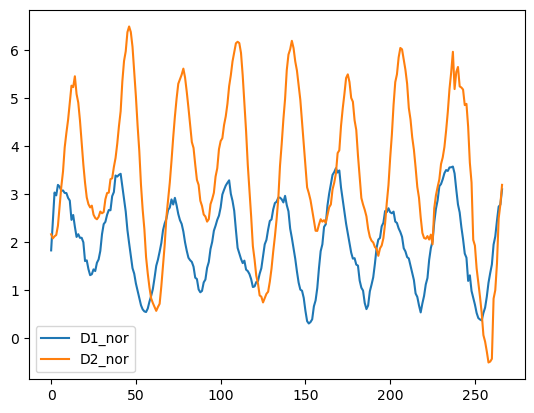

----------  0  ------------
----------  1-19-21-leona_clip2_copy.xlsx  ------------


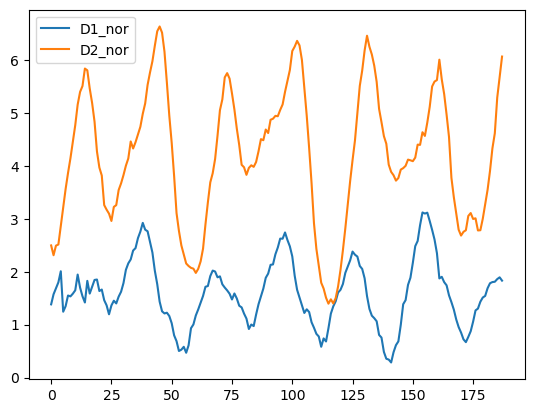

----------  0  ------------
----------  1-20-21-beyonce-clip1.xlsx  ------------


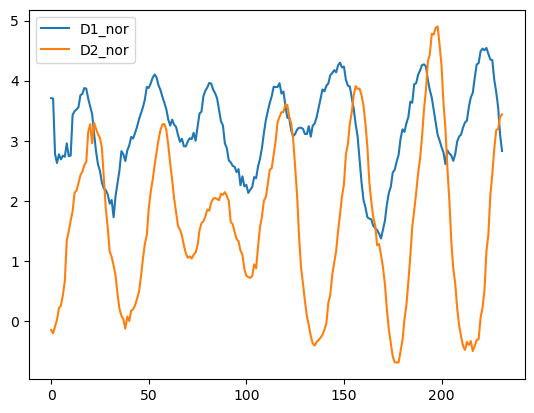

----------  0  ------------
----------  1-20-21-honey-clip1.xlsx  ------------


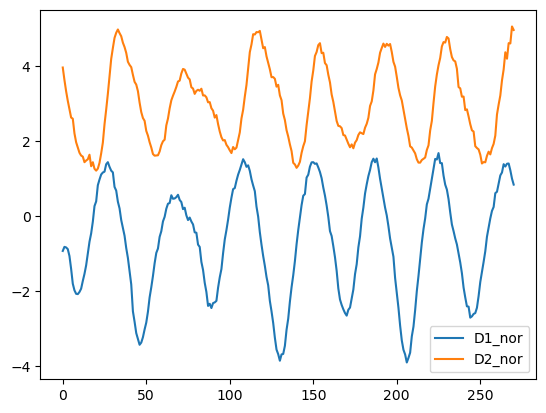

----------  0  ------------
----------  1-20-21-leona_clip1.xlsx  ------------


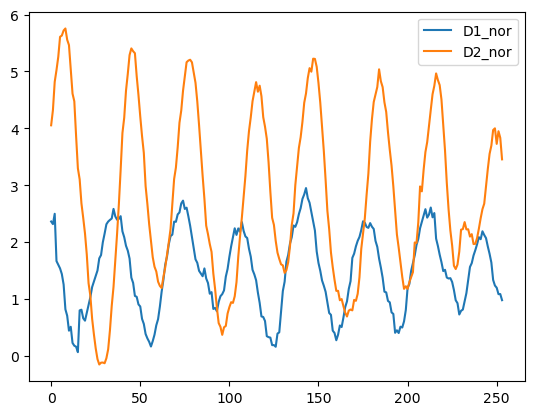

----------  1  ------------
----------  1-20-21-leona_clip2.xlsx  ------------
----------  0  ------------
----------  1-20-21-penelope_clip1.xlsx  ------------


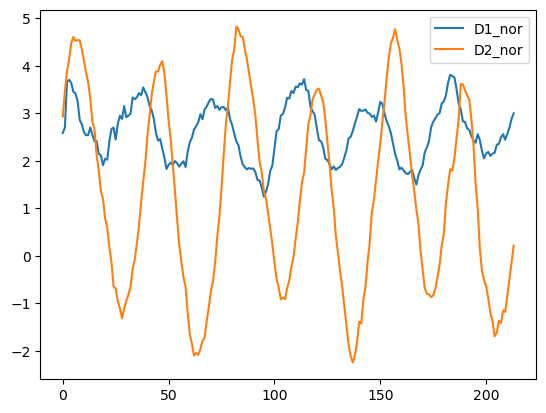

----------  0  ------------
----------  1-20-21-penelope_clip2_copy.xlsx  ------------


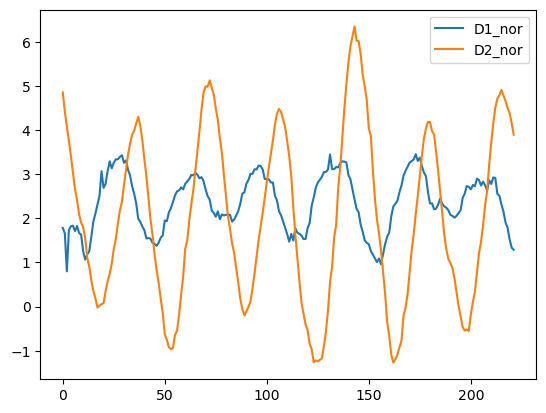

----------  0  ------------
----------  1-21-21-beyonce_clip1_copy.xlsx  ------------


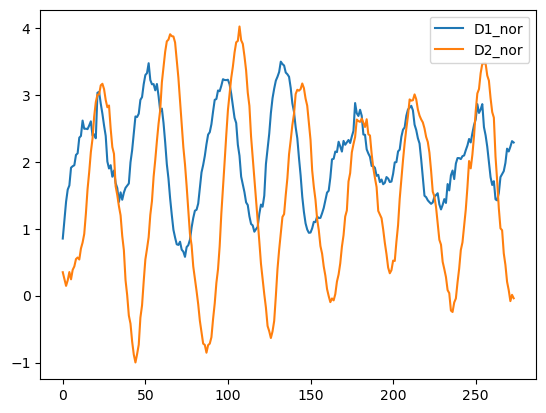

----------  1  ------------
----------  1-21-21-honey-clip2_copy.xlsx  ------------
----------  0  ------------
----------  1-21-21-penelope_clip1_copy.xlsx  ------------


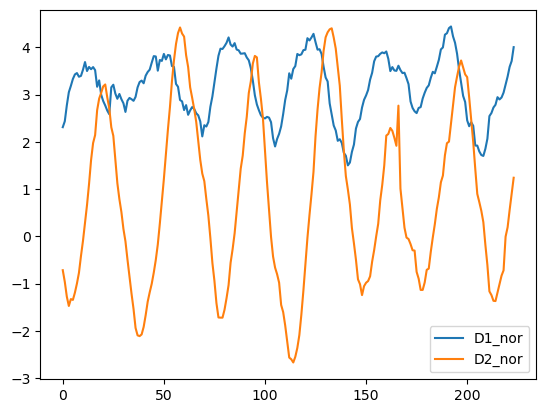

----------  0  ------------
----------  1-21-21-penelope_clip2_copy.xlsx  ------------


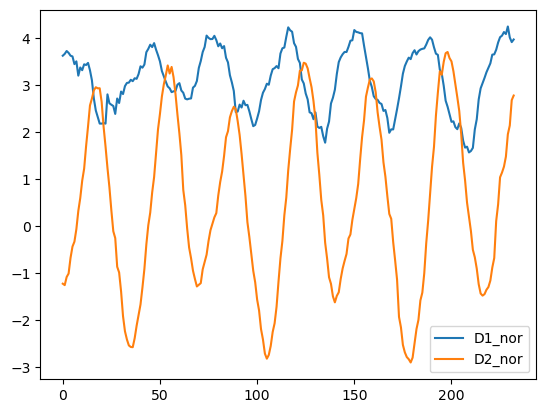

----------  0  ------------
----------  1-22-21-beyonce-clip2.xlsx  ------------


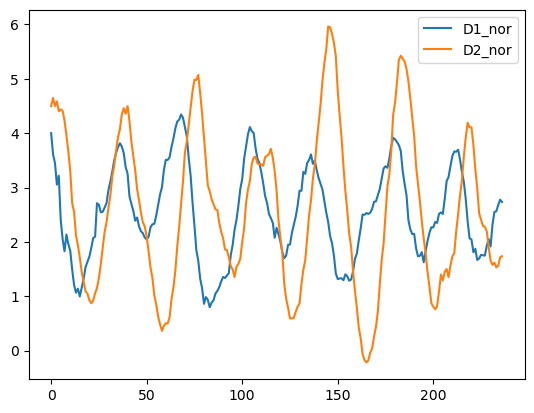

----------  1  ------------
----------  1-22-21-beyonce_clip1_copy2.xlsx  ------------
----------  1  ------------
----------  1-22-21-honey-clip1.xlsx  ------------
----------  1  ------------
----------  1-22-21-honey-clip2_copy.xlsx  ------------
----------  1  ------------
----------  1-22-21-penelope_clip1_copy.xlsx  ------------
----------  0  ------------
----------  1-25-21-moonique_clip1.xlsx  ------------


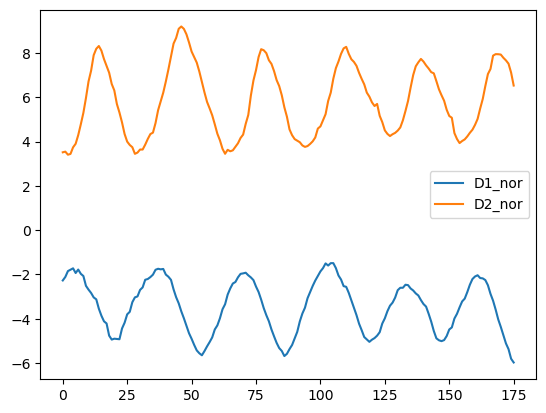

----------  0  ------------
----------  1-25-21-moonique_clip2.xlsx  ------------


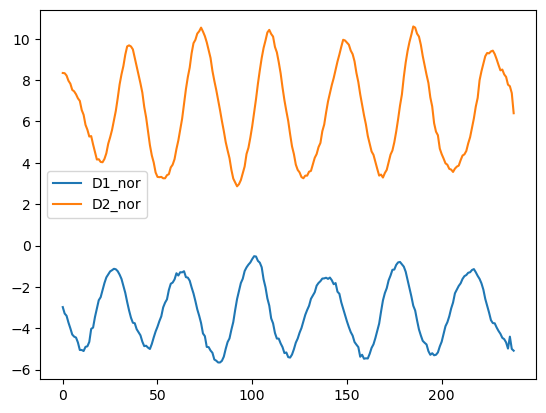

----------  0  ------------
----------  1-26-21-alice_clip1_copy.xlsx  ------------


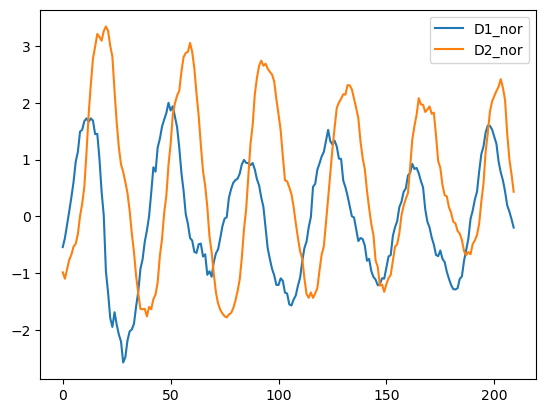

----------  0  ------------
----------  1-26-21-moonique_clip1_copy.xlsx  ------------


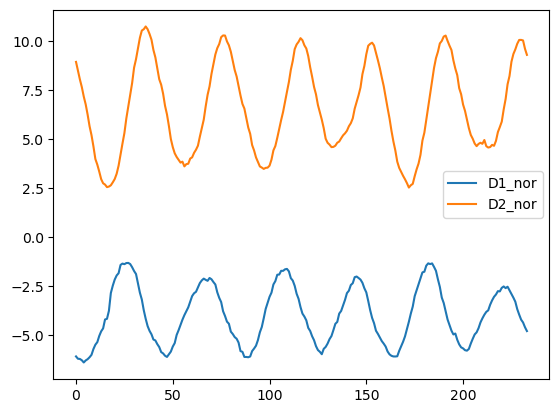

----------  0  ------------
----------  1-26-21-moonique_clip2.xlsx  ------------


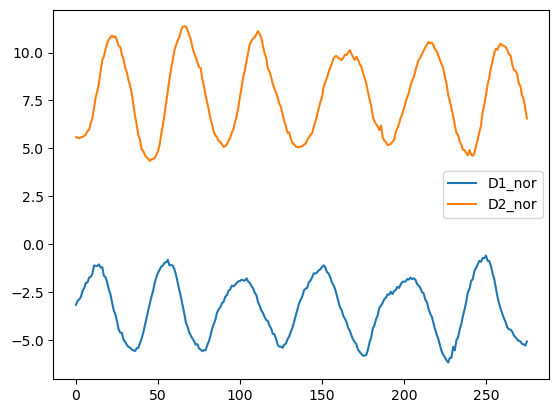

----------  0  ------------
----------  1-28-21-alice_clip1.xlsx  ------------


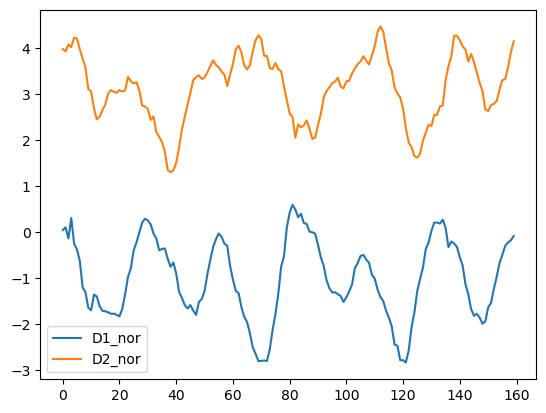

----------  1  ------------
----------  1-28-21-alice_clip2_copy.xlsx  ------------
----------  0  ------------
----------  1-28-21-moonique_clip2.xlsx  ------------


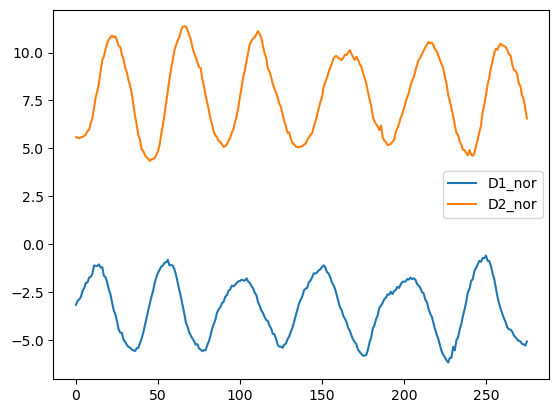

----------  1  ------------
----------  2-1-21-tweet_clip1.xlsx  ------------
----------  0  ------------
----------  2-10-21-moolan_clip1.xlsx  ------------


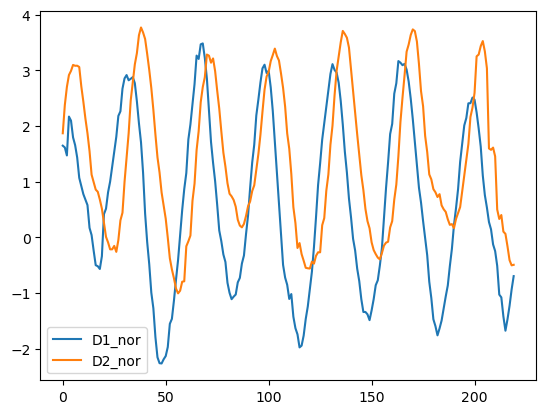

----------  0  ------------
----------  2-10-21-moolan_clip2.xlsx  ------------


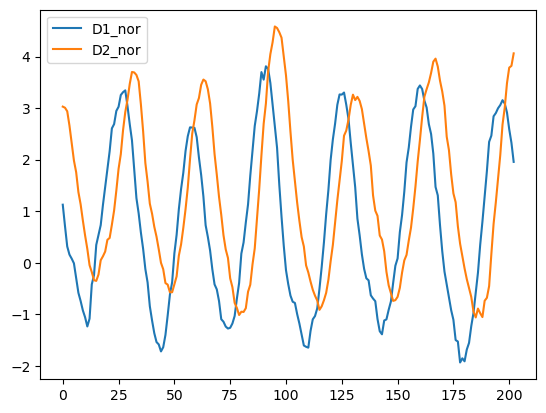

----------  0  ------------
----------  2-11-21-loza_clip1.xlsx  ------------


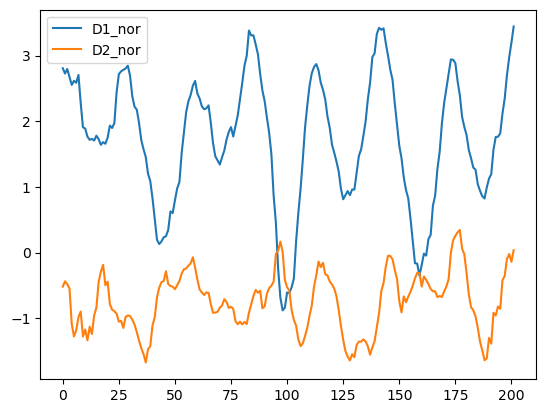

----------  0  ------------
----------  2-11-21-moon_clip1.xlsx  ------------


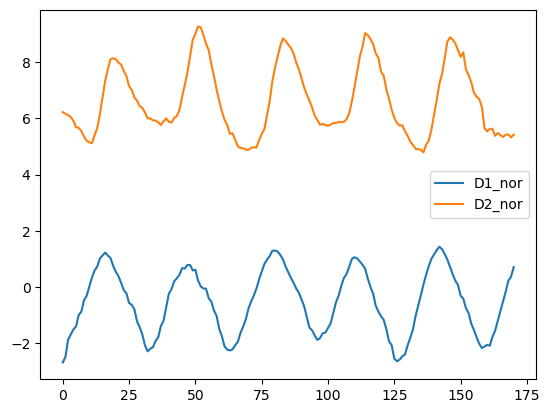

----------  1  ------------
----------  2-11-21-robin_clip1.xlsx  ------------
----------  1  ------------
----------  2-11-21-tweet_clip1.xlsx  ------------
----------  0  ------------
----------  2-12-21-leona_clip1.xlsx  ------------


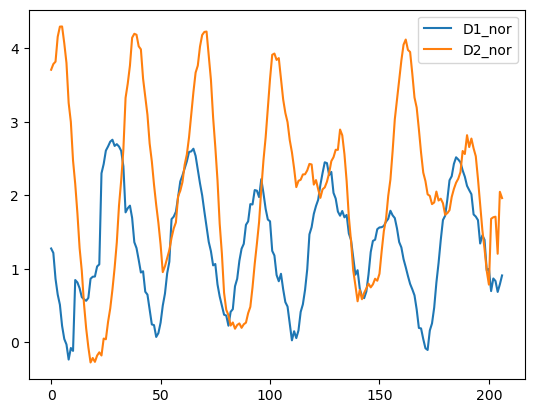

----------  0  ------------
----------  2-12-21-leona_clip2.xlsx  ------------


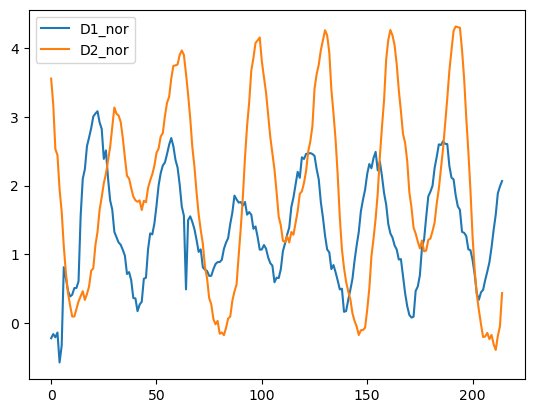

----------  0  ------------
----------  2-12-21-leona_clip3.xlsx  ------------


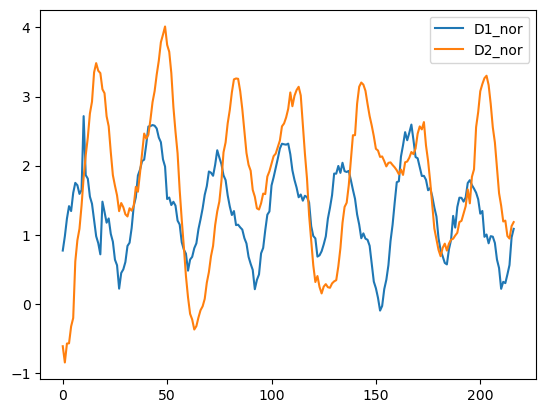

----------  0  ------------
----------  2-12-21-moon_clip1.xlsx  ------------


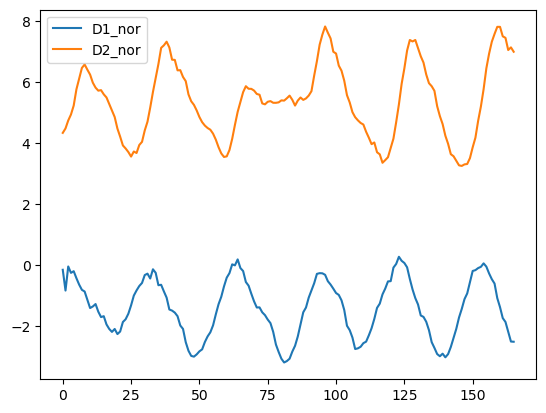

----------  1  ------------
----------  2-12-21-robin_clip1.xlsx  ------------
----------  1  ------------
----------  2-12-21-robin_clip2.xlsx  ------------
----------  1  ------------
----------  2-12-21-robin_clip3.xlsx  ------------
----------  1  ------------
----------  2-12-21-tweet_clip1.xlsx  ------------
----------  0  ------------
----------  2-2-21-loza_clip1.xlsx  ------------


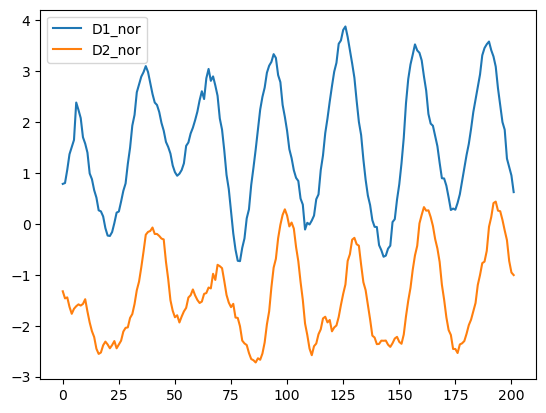

----------  0  ------------
----------  2-2-21-loza_clip2.xlsx  ------------


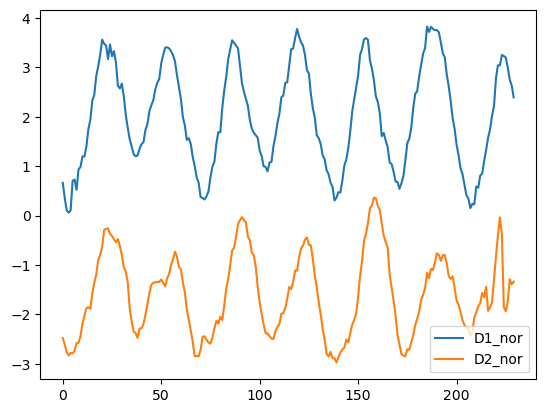

----------  0  ------------
----------  2-2-21-loza_clip3.xlsx  ------------


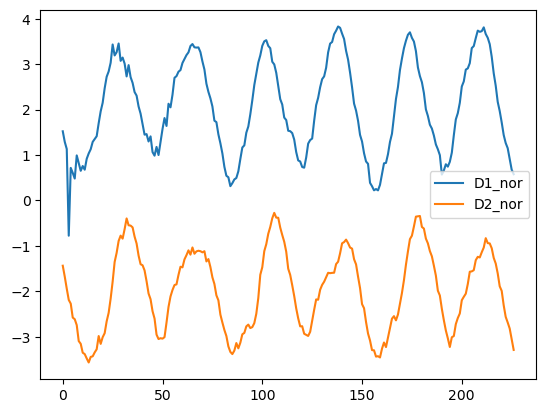

----------  1  ------------
----------  2-2-21-tweet_clip1.xlsx  ------------
----------  1  ------------
----------  2-2-21-tweet_clip2.xlsx  ------------
----------  0  ------------
----------  2-3-21-loza_clip1.xlsx  ------------


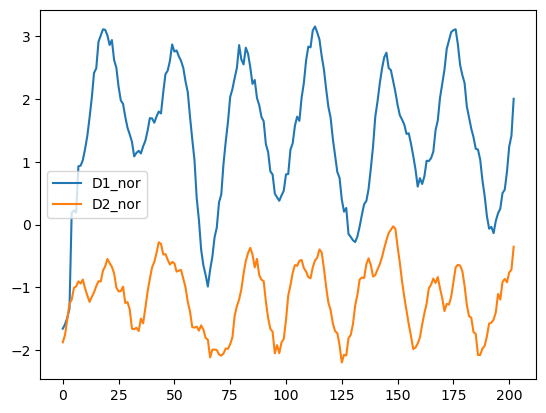

----------  0  ------------
----------  2-3-21-loza_clip3.xlsx  ------------


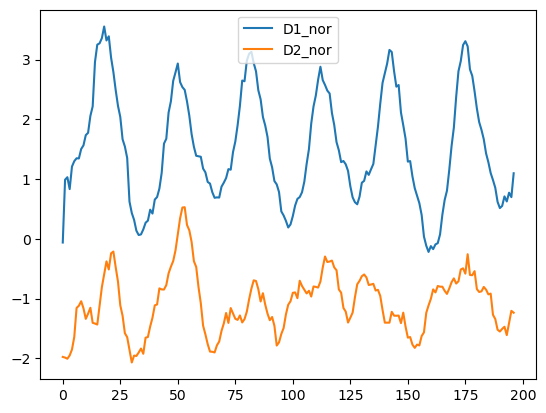

----------  0  ------------
----------  2-3-21-moon_clip1.xlsx  ------------


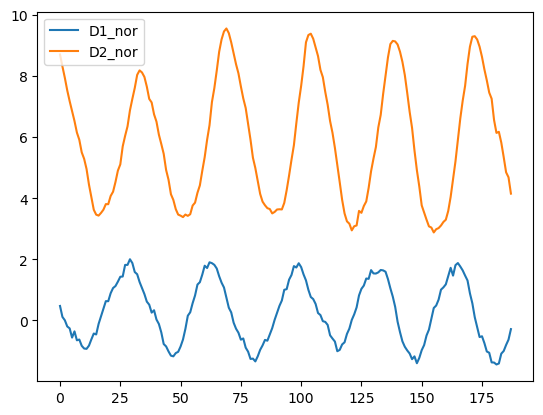

----------  0  ------------
----------  2-3-21-moon_clip2.xlsx  ------------


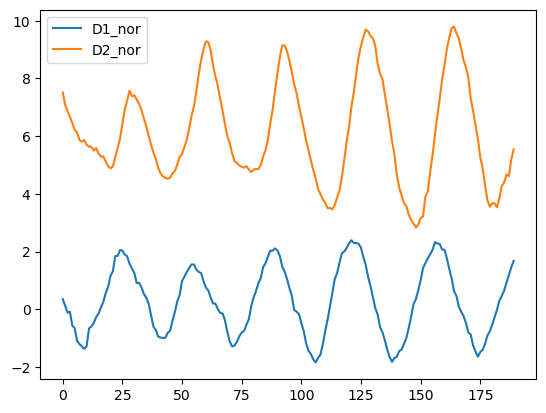

----------  1  ------------
----------  2-4-21-loza_clip1.xlsx  ------------
----------  1  ------------
----------  2-4-21-loza_clip2.xlsx  ------------
----------  0  ------------
----------  2-5-21-moon_clip1.xlsx  ------------


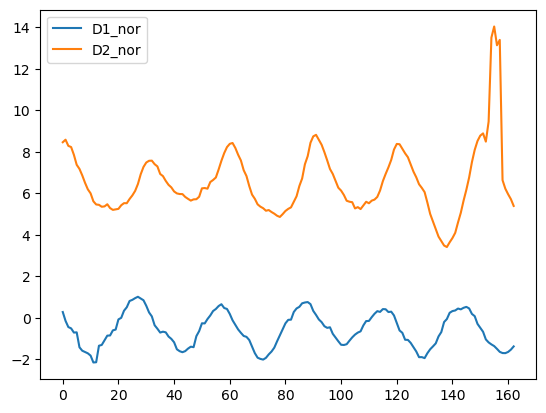

----------  0  ------------
----------  2-5-21-moon_clip2.xlsx  ------------


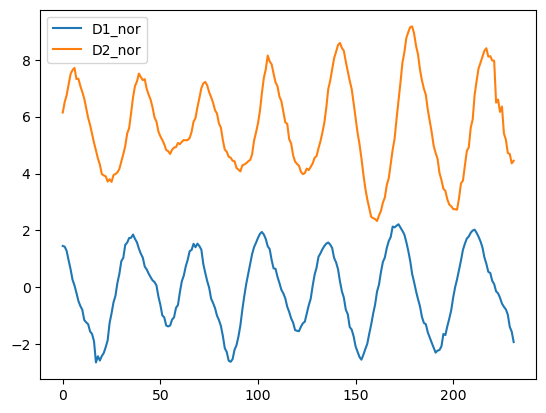

----------  0  ------------
----------  2-5-21-PtitNugget_clip1.xlsx  ------------


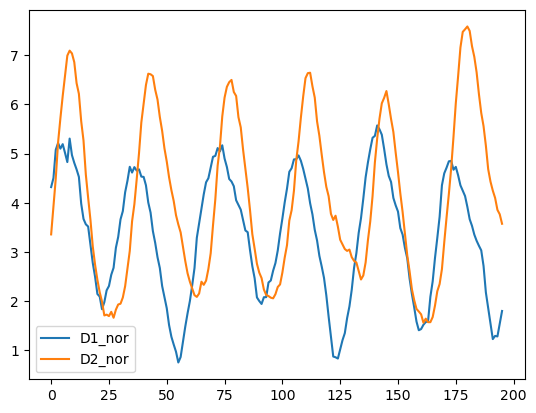

----------  1  ------------
----------  2-5-21-tweet_clip1.xlsx  ------------
----------  1  ------------
----------  2-5-21-tweet_clip2.xlsx  ------------
----------  0  ------------
----------  2-8-21-moon_clip1.xlsx  ------------


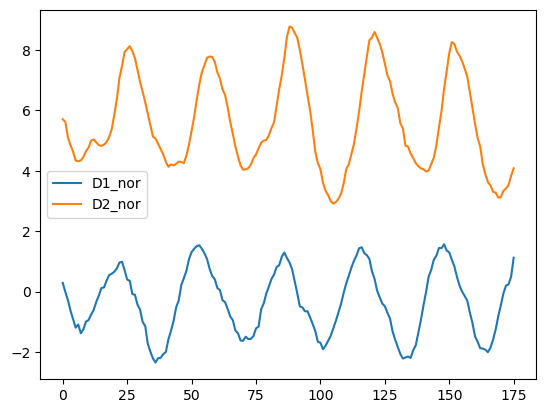

----------  0  ------------
----------  2-8-21-moon_clip2.xlsx  ------------


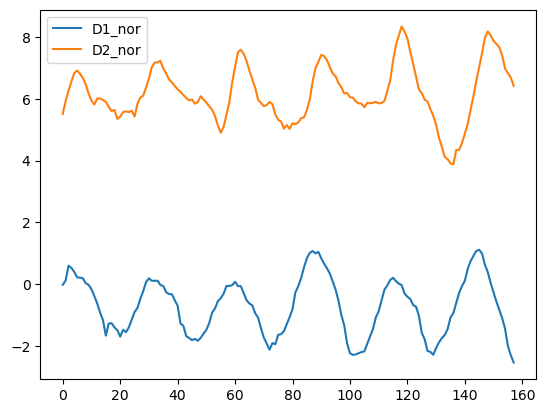

----------  0  ------------
----------  2-8-21-moon_clip3.xlsx  ------------


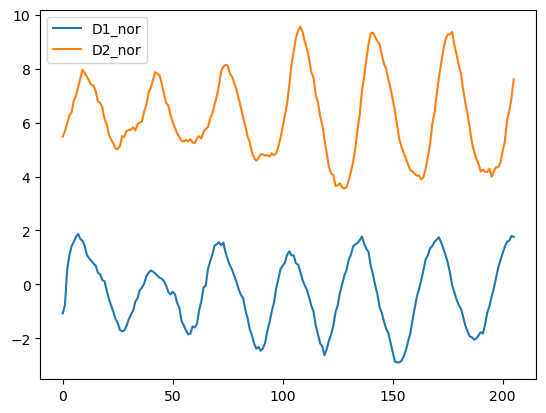

----------  0  ------------
----------  2-8-21-ptitnugget_clip2.xlsx  ------------


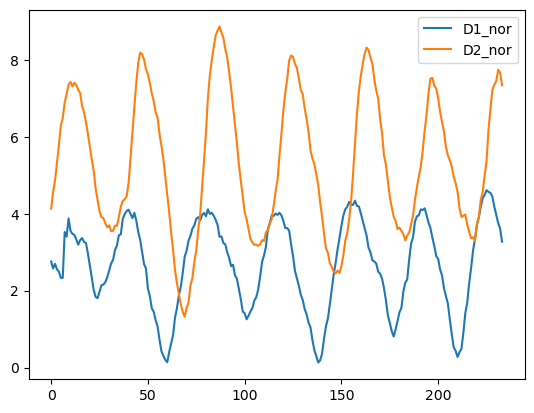

----------  0  ------------
----------  2-9-21-PtitNugget-clip1_manual.xlsx  ------------


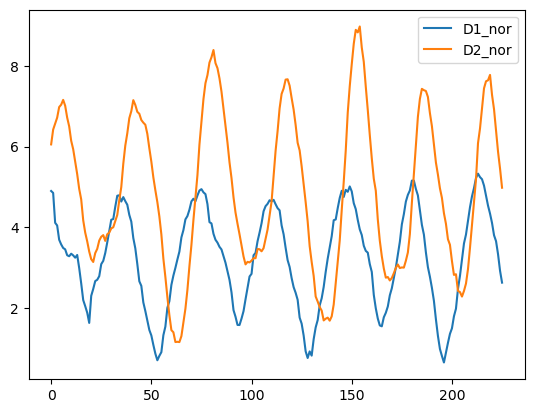

----------  0  ------------
----------  2-9-21-PtitNugget-clip2_manual.xlsx  ------------


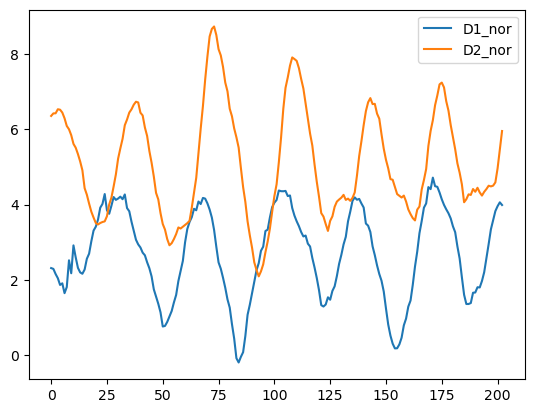

----------  0  ------------
----------  2-9-21-PtitNugget-clip3_manual.xlsx  ------------


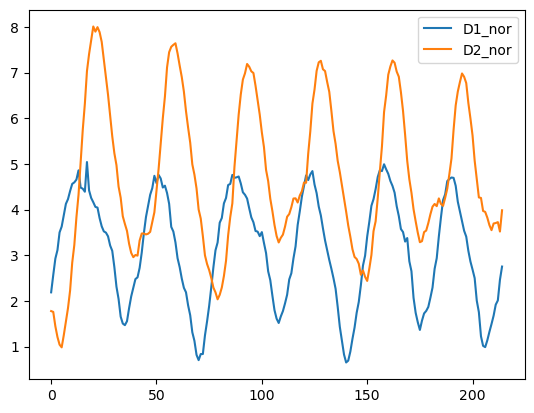

----------  0  ------------
----------  2-9-21-Robin-clip1_manual.xlsx  ------------


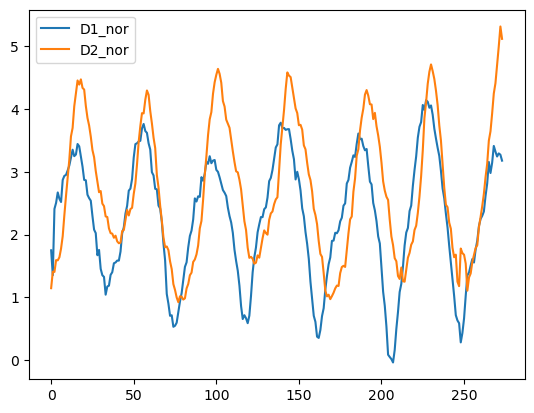

----------  0  ------------
----------  2-9-21-Robin-clip2_manual.xlsx  ------------


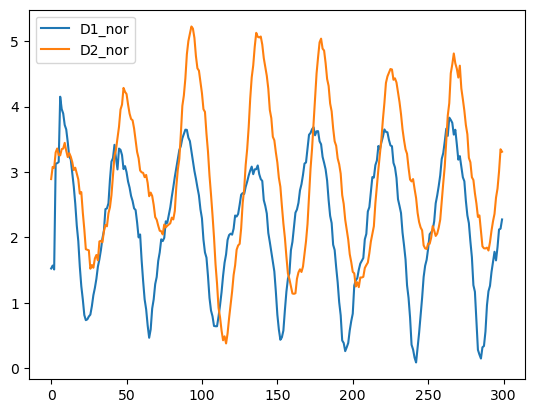

----------  1  ------------
----------  2-9-21-Robin-clip3_manual.xlsx  ------------


In [63]:
for i in range(len(pds_nor)):
    print("---------- ", binary_ls[i], " ------------")
    print("---------- ", files_xlsx[i], " ------------")
    """using func: plot_d"""
    plot_d_nor(pds_nor[i], binary_ls[i], only_pos=False)

# Now we find that the level of sound and lame is different

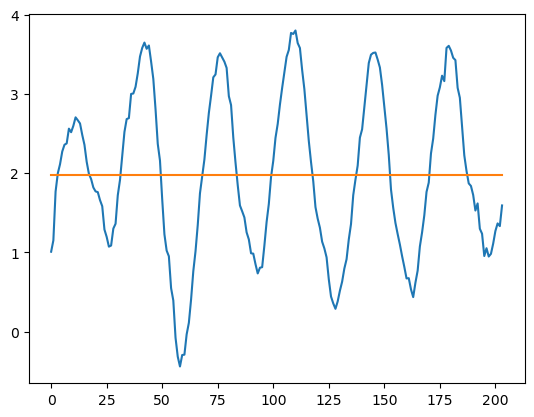

In [187]:

temp = pds_nor[0]['D1_nor']
Mean = temp.mean()
Mean_ls = [Mean for i in range(len(temp))]
plt.plot(temp.tolist())
plt.plot(Mean_ls)

In [228]:


print("Build a function to output the Level, amptitude, and frequences ")


def inner_recur(upper, lower, level, amp, freq):
    
    # base case 
    if len(upper) <= 0 or len(lower) <= 0: 
        return None
    
    # loop through the upper and lower
    # find level: highest or lowest points
    one_up = []
    one_low = []
    up_switch = True
    low_switch = False
    for i in range(len(upper)): 
        if type(upper[i]) != str and (up_switch==True): 
            one_up.append(upper[i])
            low_switch = True
        if (type(lower[i]) != str) and (low_switch==True): 
            one_low.append(lower[i])
            up_switch = False
        if type(upper[i]) != str and up_switch == False: 
            # cut 
            upper = upper[i:]
            lower = lower[i:]
            #print("one_up: ", one_up, one_low)
            #print("length: ", len(upper), len(lower))
            #print("upper: ", upper, lower)
            # compute 
            level_f = (max(one_up) + min(one_low))/2
            amp_f = abs(max(one_up) - min(one_low))
            freq_f = 1/(len(one_up) + len(one_low))
            
            # append to pd series 
            #level = pd.concat([level, pd.Series(level_f)])
            #amp = pd.concat([amp, pd.Series(amp_f)])
            #freq = pd.concat([freq, pd.Series(freq_f)])
            
            level.append(level_f)
            amp.append(amp_f)
            freq.append(freq_f)
            
            #print(level, amp, freq)
            return inner_recur(upper, lower, level, amp, freq)
        
def analyze_wave(mean, wave): 
    
    upper = []
    lower = []
    
    for idx in range(len(wave)): 
        
        if wave[idx] > mean: 
            upper.append(wave[idx])
            lower.append('+')
        else: 
            upper.append('-')
            lower.append(wave[idx])
    
    level, amp, freq = [], [], []
    
    """using func: """
    try:
        upper, lower, level, amp, freq = inner_recur(upper, lower, level, amp, freq)
        #upper, lower = inner_recur(upper, lower)
        
    except TypeError :
        pass
    
    print(level, amp, freq)
    eps = 0.0000001

    return sum(level)/(len(level)+eps), sum(amp)/(len(amp)+eps), sum(freq)/(len(freq)+eps)


Build a function to output the Level, amptitude, and frequences 


In [229]:
mean, wave = Mean, temp.tolist()
level, amp, freq = analyze_wave(mean, wave)

[1.887780196078423, 1.6035201960784375, 2.12324019607843, 2.043720196078444, 1.9784701960784332] [1.631940000000008, 4.0872599999999935, 2.7781400000000396, 3.5122600000000146, 3.0867199999999873] [0.034482758620689655, 0.02702702702702703, 0.03225806451612903, 0.02631578947368421, 0.030303030303030304]


In [230]:
level, amp, freq

(1.9273461575315103, 3.0192639396147296, 0.030077333386565375)

In [231]:

def plot_d_diff(test, binary_score, only_pos=False):

    # if only plot pos, return none for neg class
    if only_pos != binary_score: return None 

    # plot D1
    D1_mean = test['D1_nor'].mean()
    D1_wave = test['D1_nor'].tolist() 
    """using func: """
    level, amp, freq = analyze_wave(D1_mean, D1_wave)
    print("D1: ", level, amp, freq)
    
    D2_mean = test['D2_nor'].mean()
    D2_wave = test['D2_nor'].tolist() 
    """using func: """
    level2, amp2, freq2 = analyze_wave(D2_mean, D2_wave)
    print("D2: ", level2, amp2, freq2)
    
    
    print("Diff: ", level-level2, amp-amp2, freq-freq2)
    print("\n ---------- \n")
    
    return level-level2

In [232]:
dd_pos = []
for i in range(len(pds_nor)):
    dd = plot_d_diff(pds_nor[i], binary_ls[i], only_pos=True)
    if dd:
        dd_pos.append(dd) 
print(dd_pos)

[2.1546707555555566, 2.1138107555555696, 2.09915075555557, 1.9049807555555764, 2.0314507555555474, 2.204340755555562, 1.7738007555555555] [0.06235999999998665, 1.7321199999999903, 2.0874800000000207, 1.836779999999992, 1.8110000000000084, 0.8134200000000105, 2.218100000000015] [0.5, 0.02564102564102564, 0.02857142857142857, 0.03125, 0.02857142857142857, 0.029411764705882353, 0.030303030303030304]
D1:  2.0403150121224907 1.50875140701784 0.09624980973825921
[2.5123996444444443, 2.4167596444444275, 2.175449644444457, 2.5767696444444463, 1.9442196444444428, 2.041389644444452] [2.3457200000000222, 2.5036000000000023, 1.6859400000000129, 2.939580000000004, 1.766760000000033, 5.002780000000026] [0.02857142857142857, 0.02564102564102564, 0.037037037037037035, 0.02702702702702703, 0.037037037037037035, 0.023809523809523808]
D2:  2.277831273147257 2.707396621543406 0.029853846022949083
Diff:  -0.23751626102476653 -1.1986452145255662 0.06639596371531012

 ---------- 

[2.3987711382113717, 2.1700

In [234]:
dd_neg = []
for i in range(len(ls_pds)):
    print("---------- ", binary_ls[i], " ------------")
    print("---------- ", files_xlsx[i], " ------------")
    """using func: plot_d"""
    dd = plot_d_diff(ls_pds[i], binary_ls[i], only_pos=False)
    if dd:
        dd_neg.append(dd) 
    
print(dd_neg)

----------  0  ------------
----------  1-18-21-leona-clip1.xlsx  ------------
[1.091290196078435] [0.28775999999998003] [0.16666666666666666]
D1:  1.0912900869494262 0.2877599712239829 0.16666665000000164
[] [] []
D2:  0.0 0.0 0.0
Diff:  1.0912900869494262 0.2877599712239829 0.16666665000000164

 ---------- 

----------  0  ------------
----------  1-18-21-leona-clip2_copy.xlsx  ------------
[1.7584107692307729, 1.4822707692307668, 1.093070769230771] [2.751800000000017, 0.12848000000000193, 2.052160000000006] [0.029411764705882353, 0.5, 0.041666666666666664]
D1:  1.444584054411302 1.6441466118617878 0.1903594707788673
[4.9426255384615345, 4.050185538461529, 4.944195538461533] [4.4758399999999865, 4.093000000000008, 4.043539999999986] [0.041666666666666664, 0.03125, 0.038461538461538464]
D2:  4.645668716939242 4.20412652652911 0.0371260671385328
Diff:  -3.20108466252794 -2.5599799146673217 0.1532334036403345

 ---------- 

----------  0  ------------
----------  1-19-21-honey-clip1.xls

In [221]:
print(binary_ls.count(0))
print(len(dd_neg))
print(binary_ls.count(1))
print(len(dd_pos))

63
59
6
6


In [224]:
print("rough estimate SP, SE: ")
pos_pred = [1 if abs(i) < 0.85 else 0 for i in dd_pos]
neg_pred = [1 if abs(i) < 0.85 else 0 for i in dd_neg]
pred = pos_pred + neg_pred
print(pred)

rough estimate SP, SE: 
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [225]:
label = [1 for i in range(len(pos_pred))] + [0 for i in range(len(neg_pred))]

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

    
# this func requie y_test to have at least two classes
y_test, y_pred = label, pred
auc = roc_auc_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sp = tn / (tn + fp)
se = tp / (tp + fn)

print("sp, se, auc: ", sp, se, auc)

sp, se, auc:  0.847457627118644 1.0 0.923728813559322
